In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 96293 rows × 18 columns
df = pd.read_csv("train_data_mm.csv") # train 데이터셋 불러오기
df.head(3)

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액,대출목적,주택소유상태,근로기간,대출등급
0,0.658671,0.0,0.783116,0.324713,0.329845,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.658669,1,2,6,2
1,0.698921,1.0,0.808957,0.341979,0.420151,0.0,0.731015,0.795184,0.0,0.0,0.758338,0.057717,0.555240,10,0,1,1
2,0.647640,0.0,0.795568,0.245568,0.311543,0.0,0.782895,0.767395,0.0,0.0,0.791120,0.120407,0.647638,1,0,5,0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# 머신러닝모델 라이브러리 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 평가 라이브러리
from sklearn.metrics import accuracy_score, f1_score

## 1) 전체 feature에 대해 XGBoost, GradientBoosting

In [5]:
X_features = ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율', '월별대출금액']

In [6]:
X = df[X_features] 
y = df['대출등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

#### 1) XGBoost

In [7]:
# xgboost

model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb)

,accuracy,F1
train,0.826077,0.825775
test,0.807207,0.806389


In [8]:
model_xgb.feature_importances_

array([0.02218815, 0.3098126 , 0.02220559, 0.02005085, 0.01001266,
       0.01937176, 0.10844205, 0.1204586 , 0.00507239, 0.00416224,
       0.03622973, 0.29666862, 0.02532468], dtype=float32)

In [9]:
importances = model_xgb.feature_importances_
features = df.columns

# 변수이름과 feature importance 값 함께 출력
for feature_name, importance in zip(features, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: 대출금액, Importance: 0.022188153117895126
Feature: 대출기간, Importance: 0.30981260538101196
Feature: 연간소득, Importance: 0.022205591201782227
Feature: 부채_대비_소득_비율, Importance: 0.02005084790289402
Feature: 총계좌수, Importance: 0.01001265924423933
Feature: 최근_2년간_연체_횟수, Importance: 0.019371764734387398
Feature: 총상환원금, Importance: 0.1084420457482338
Feature: 총상환이자, Importance: 0.12045859545469284
Feature: 총연체금액, Importance: 0.005072391591966152
Feature: 연체계좌수, Importance: 0.004162240773439407
Feature: 총상환액, Importance: 0.036229733377695084
Feature: 총상환대출비율, Importance: 0.2966686189174652
Feature: 월별대출금액, Importance: 0.02532467618584633


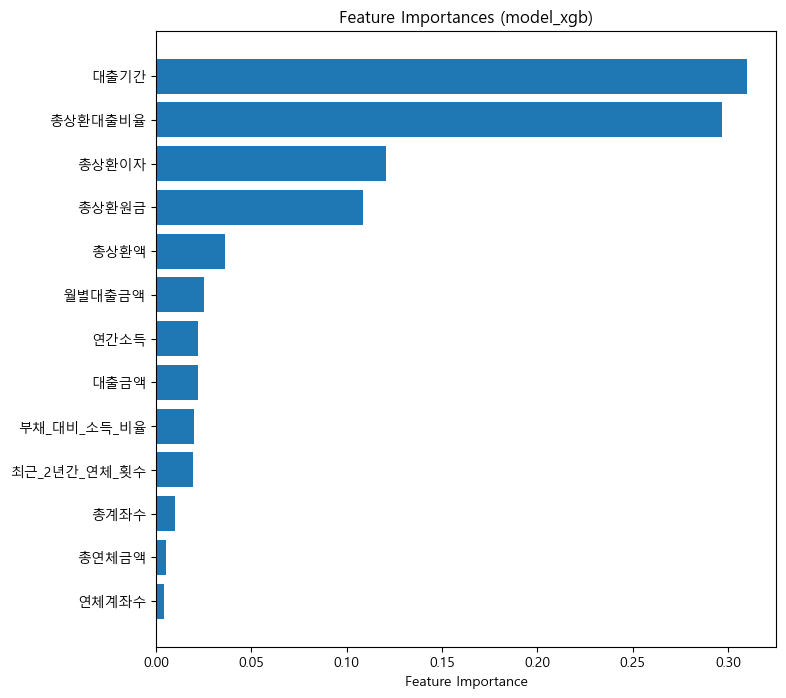

In [10]:
# 피처 중요도 얻기
feature_importances = model_xgb.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_model_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_model_xgb = feature_importance_model_xgb.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_model_xgb['Feature'], feature_importance_model_xgb['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (model_xgb)')
plt.show()

대출기간, 총상환대출비율, 총상환이자, 총상환원금, 총상환액, 월별대출금액, 연간소득, 대출금액, 부채_대비_소득_비율, 최근_2년간_연체_횟수, 총계좌수, 총연체금액, 연체계좌수

#### 2) GradientBoosting

In [11]:
# GradientBoosting

model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5) 
model_gb.fit(X_train, y_train)

y_pred_train = model_gb.predict(X_train)
y_pred_test = model_gb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.887881,0.887983
test,0.859027,0.858641


In [12]:
importances = model_gb.feature_importances_
features = df.columns

# 변수이름과 feature importance 값 함께 출력
for feature_name, importance in zip(features, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: 대출금액, Importance: 0.005139082032845614
Feature: 대출기간, Importance: 0.07438845140686061
Feature: 연간소득, Importance: 0.004481222875924366
Feature: 부채_대비_소득_비율, Importance: 0.0038973531693817223
Feature: 총계좌수, Importance: 0.0015578693844864216
Feature: 최근_2년간_연체_횟수, Importance: 0.0008227518409109255
Feature: 총상환원금, Importance: 0.1427814490321521
Feature: 총상환이자, Importance: 0.130642274672234
Feature: 총연체금액, Importance: 0.0003801967181217008
Feature: 연체계좌수, Importance: 2.3970190839314026e-05
Feature: 총상환액, Importance: 0.010820279661696708
Feature: 총상환대출비율, Importance: 0.6202254241161287
Feature: 월별대출금액, Importance: 0.004839674898417833


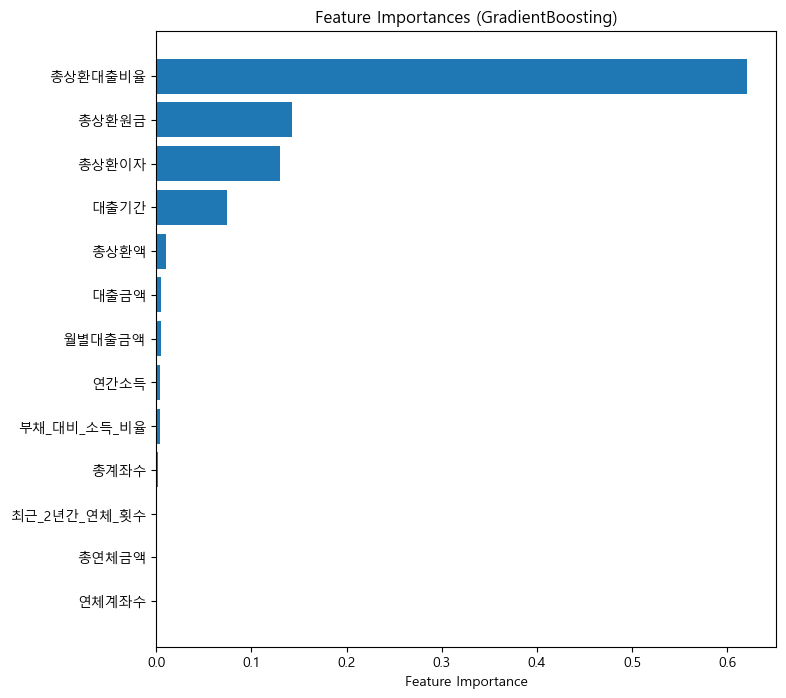

In [13]:
# 피처 중요도 얻기
feature_importances = model_gb.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_model_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_model_gb = feature_importance_model_gb.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_model_gb['Feature'], feature_importance_model_gb['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (GradientBoosting)')
plt.show()

총상환대출비율, 총상환원금, 총상환이자, 대출기간, 총상환액, 대출금액, 월별대출금액, 연간소득, 부채_대비_소득_비율, 총계좌수, 최근_2년간_연체_횟수, 총연체금액, 연체계좌수

## 2) feature 조정 - 임계값 설정

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
# 특성 중요도를 계산하여 중요한 변수들을 선택 (model_xgb)
# 임계값보다 낮은 변수 제거

# 특성 중요도 확인
feature_importances = model_xgb.feature_importances_

# 중요도가 낮은 특성 제거
selector = SelectFromModel(model_xgb, threshold=0.05)
selector.fit(X_train, y_train)

# 선택된 특성들만 남기기
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# 선택된 특성들의 이름 확인
selected_features = X.columns[selector.get_support()]

print("선택된 변수:", selected_features)


선택된 변수: Index(['대출기간', '총상환원금', '총상환이자', '총상환대출비율'], dtype='object')


In [16]:
# 특성 중요도를 계산하여 중요한 변수들을 선택 (model_xgb)
# 임계값보다 높은 변수 선택

# 변수 중요도를 확인
feature_importance = model_xgb.feature_importances_

# 중요도가 높은 변수 선택 (임계값 설정)
threshold = 0.05

# 중요도가 높은 변수 선택
selected_features = [feature for feature, importance in zip(X_features, feature_importance) if importance >= threshold]

# 선택된 변수 확인
print("선택된 변수:", selected_features)

# 선택된 변수들을 이용하여 데이터셋을 업데이트
selected_data = df[selected_features]

선택된 변수: ['대출기간', '총상환원금', '총상환이자', '총상환대출비율']


In [18]:
# 특성 중요도를 계산하여 중요한 변수들을 선택 (model_gb)
# 임계값보다 높은 변수 선택

# 변수 중요도를 확인
feature_importance = model_gb.feature_importances_

# 중요도가 높은 변수 선택 (임계값 설정)
threshold = 0.05 

# 중요도가 높은 변수 선택
selected_features = [feature for feature, importance in zip(X_features, feature_importance) if importance >= threshold]

# 선택된 변수 확인
print("선택된 변수:", selected_features)

# 선택된 변수들을 이용하여 데이터셋을 업데이트
selected_data = df[selected_features]


선택된 변수: ['대출기간', '총상환원금', '총상환이자', '총상환대출비율']


## 3) 하이퍼파라메터 튜닝

- '대출기간', '총상환원금', '총상환이자', '총상환대출비율' 만 남기고 삭제  
- 새로운 X_features2 생성

In [36]:
from sklearn.model_selection import train_test_split

X_features2 = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율']

X = df[X_features2] 
y = df['대출등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

#### 1) XGBoost

In [37]:
# xgboost

model_xgb = XGBClassifier(n_estimators=500, learning_rate=0.5, max_depth=10, subsample=1, tree_method = "exact")
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb)

,accuracy,F1
train,0.964042,0.964231
test,0.920505,0.920340


#### 2) GradientBoosting

In [38]:
# GradientBoosting

model_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=10) 
model_gb.fit(X_train, y_train)

y_pred_train = model_gb.predict(X_train)
y_pred_test = model_gb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.964042,0.964231
test,0.914274,0.913991


## 4) 그리드 서치 결과

- XGBClassifier 그리드서치

In [47]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# XGBoost 모델 정의
model_xgb = XGBClassifier()

# 탐색할 하이퍼파라미터 공간 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.2, 0.5],  # 학습률
    'max_depth': [3, 5, 7, 10],  # 트리의 최대 깊이
    'subsample': [0.6, 0.8, 1.0],  # 각 트리에서 사용할 샘플의 비율
    'tree_method': ['auto', 'exact', 'approx', 'hist'],  # 트리 구성 방법
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 성능 측정
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

# 결과 출력
result_xgb_tuned = pd.DataFrame({'accuracy': [train_accuracy, test_accuracy],
                                  'F1': [train_f1_score, test_f1_score]},
                                  index=['train', 'test'])

print(result_xgb_tuned)

- GradientBoostingClassifier 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# GradientBoosting 모델 정의
model_gb = GradientBoostingClassifier()

# 탐색할 하이퍼파라미터 공간 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 10, 15],
    'subsample': [0.5, 0.7, 1.0],
    'loss': ['deviance', 'exponential']
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 성능 측정
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

# 결과 출력
result_gb_tuned = pd.DataFrame({'accuracy': [train_accuracy, test_accuracy],
                                 'F1': [train_f1_score, test_f1_score]},
                                 index=['train', 'test'])

print(result_gb_tuned)

최적의 하이퍼파라미터: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
       accuracy        F1
train  0.964042  0.964231
test   0.913183  0.912917
